# Import Library

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf

# Load Dataset

In [ ]:
from google.colab import files

files.upload()
data = pd.read_csv('diamonds.csv')

Saving diamonds.csv to diamonds.csv


# Data Preparation

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
data.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [ ]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
data = data.drop(['Unnamed: 0'], axis=1)

In [ ]:
data = pd.get_dummies(data, columns = ['cut','color', 'clarity'])

In [ ]:
data.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0


In [ ]:
data.corr()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387,0.091844,0.034196,-0.163660,...,0.161494,0.180054,0.120983,-0.114449,0.062669,0.267483,-0.063094,-0.038904,-0.167571,-0.137024
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924,0.280657,0.136114,-0.022778,...,0.022630,0.022543,0.081135,-0.030881,0.040899,0.007202,-0.024169,-0.009459,-0.023477,-0.019243
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929,0.125332,0.175174,-0.549599,...,0.017967,0.037253,0.044716,-0.078766,0.051959,0.095344,-0.026858,-0.009655,-0.069103,-0.062273
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249,0.018728,-0.000312,-0.097175,...,0.097125,0.081710,-0.000255,-0.049596,0.008957,0.128420,-0.009886,-0.001062,-0.095266,-0.052381
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772,0.080644,0.030349,-0.162674,...,0.146522,0.164658,0.108361,-0.125976,0.079241,0.270827,-0.059882,-0.035507,-0.185253,-0.147151
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006,0.068822,0.032187,-0.153158,...,0.142895,0.160776,0.100736,-0.120800,0.076097,0.263252,-0.056490,-0.035928,-0.179271,-0.141624
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000,0.110367,0.045169,-0.158688,...,0.145276,0.164217,0.111913,-0.125248,0.081005,0.263192,-0.058513,-0.036314,-0.182401,-0.144746
cut_Fair,0.091844,0.280657,0.125332,0.018728,0.080644,0.068822,0.110367,1.000000,-0.055482,-0.143078,...,0.004770,0.017257,0.175852,-0.027022,0.004587,0.055506,-0.022453,-0.027266,-0.039920,-0.030703
cut_Good,0.034196,0.136114,0.175174,-0.000312,0.030349,0.032187,0.045169,-0.055482,1.000000,-0.258018,...,0.006187,0.014977,0.015844,-0.033046,0.055938,0.041970,-0.017116,-0.021063,-0.037564,-0.038627
cut_Ideal,-0.163660,-0.022778,-0.549599,-0.097175,-0.162674,-0.153158,-0.158688,-0.143078,-0.258018,1.000000,...,-0.009225,-0.038490,-0.048795,0.104986,-0.082865,-0.108242,0.034247,0.015669,0.088354,0.075508


# Perform train-test-split

In [ ]:
data_features = data.drop(['price'], axis =1)
data_labels = data['price']

In [ ]:
x = data_features.to_numpy()
y = data_labels.to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 12345)

standardizer = preprocessing.StandardScaler()
standardizer.fit(x_train)
x_train = standardizer.transform(x_train)
x_test = standardizer.transform(x_test)  

# Model Creation

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                864       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,409
Trainable params: 1,409
Non-trainable params: 0
_________________________________________________________________


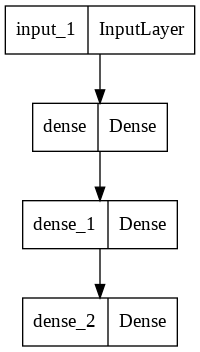

In [ ]:
model = tf.keras.Sequential()

model.add(tf.keras.Input(shape=(x.shape[1],)))
model.add(tf.keras.layers.Dense(32, activation = 'relu')) 
model.add(tf.keras.layers.Dense(16, activation = 'relu')) 
model.add(tf.keras.layers.Dense(1,activation = 'linear'))

model.summary()
tf.keras.utils.plot_model(model)

In [ ]:
tf.keras.backend.clear_session

<function keras.backend.clear_session>

In [ ]:
model.compile(optimizer='adam', loss='mse',metrics=['mse','mae'])
history=model.fit(x_train, y_train, validation_data=(x_test,y_test), batch_size=10, epochs =20)

Epoch 1/20
4316/4316 [==============================] - 11s 2ms/step - loss: 6378866.0000 - mse: 6378866.0000 - mae: 1416.1003 - val_loss: 1279162.2500 - val_mse: 1279162.2500 - val_mae: 631.7495
Epoch 2/20
4316/4316 [==============================] - 10s 2ms/step - loss: 895352.7500 - mse: 895352.7500 - mae: 586.8540 - val_loss: 1150802.6250 - val_mse: 1150802.6250 - val_mae: 533.5935
Epoch 3/20
4316/4316 [==============================] - 10s 2ms/step - loss: 758991.8750 - mse: 758991.8750 - mae: 490.0310 - val_loss: 1027918.6875 - val_mse: 1027918.6875 - val_mae: 441.3904
Epoch 4/20
4316/4316 [==============================] - 10s 2ms/step - loss: 666555.6875 - mse: 666555.6875 - mae: 423.8947 - val_loss: 986343.8750 - val_mse: 986343.8750 - val_mae: 406.0146
Epoch 5/20
4316/4316 [==============================] - 10s 2ms/step - loss: 613831.9375 - mse: 613831.9375 - mae: 393.6404 - val_loss: 935227.2500 - val_mse: 935227.2500 - val_mae: 382.3943
Epoch 6/20
4316/4316 [==============

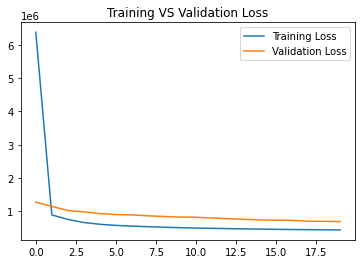

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

training_loss = history.history['loss'] 
val_loss = history.history['val_loss'] 
epochs = history.epoch

plt.plot(epochs, training_loss, label ='Training Loss')
plt.plot(epochs, val_loss, label ='Validation Loss')
plt.title('Training VS Validation Loss')
plt.legend()
plt.figure()
plt.show()

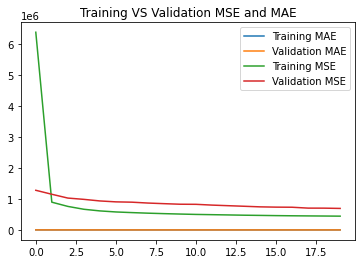

<Figure size 432x288 with 0 Axes>

In [20]:
training_mae = history.history['mae'] 
val_mae = history.history['val_mae'] 
training_mse = history.history['mse'] 
val_mse = history.history['val_mse'] 
epochs = history.epoch

plt.plot(epochs, training_mae, label ='Training MAE')
plt.plot(epochs, val_mae, label ='Validation MAE')
plt.plot(epochs, training_mse, label ='Training MSE')
plt.plot(epochs, val_mse, label ='Validation MSE')
plt.title('Training VS Validation MSE and MAE')
plt.legend()
plt.figure()
plt.show()
